# Import

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load DataFrame

In [2]:
df_sat = pickle.load(open("../../data/sat_data.pkl","rb"))
df_physical = pickle.load(open("../../data/physical_fitness_data.pkl","rb"))
df_unemployment = pickle.load(open("../../data/unemployment_rates.pkl","rb"))
df_crime = pickle.load(open("../../data/crime_rates.pkl","rb"))

# Collect Total SAT Scores and Unemployment Rate

In [3]:
sat_total = []
sat_total_county = np.zeros((1,58))
for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)
    sat_total.append(total)
    sat_total_county += np.array(total)

In [4]:
county_list = [a.rstrip(", CA") for a in df_unemployment.index.tolist()]
unemployment_sum = np.array(df_unemployment.sum(axis=1).tolist())
unemployment_sort = np.argsort(unemployment_sum)

# Rank Data Plot

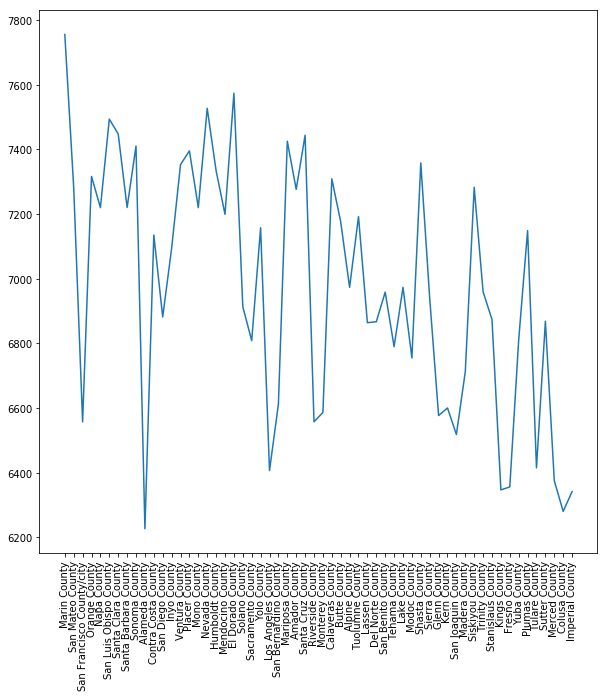

In [6]:
x_list = [county_list[a] for a in unemployment_sort]
y_list = [sat_total_county[0][a] for a in unemployment_sort]
plt.figure(figsize=(10,10))
plt.plot(x_list,y_list)
plt.xticks([i for i in range(len(county_list))],x_list,rotation="vertical")
plt.show()

# Scatter Plot

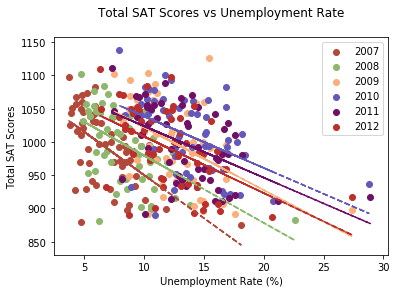

In [7]:
np.random.seed(123)
plt.figure()
for year in range(2007,2013):
    x_list = df_unemployment.xs(str(year),axis=1).tolist()
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Total SAT Scores vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])

np.random.seed(123)
for year in range(2007,2013):
    x_list = df_unemployment.xs(str(year),axis=1).tolist()
    y_list = sat_total[year-2007]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

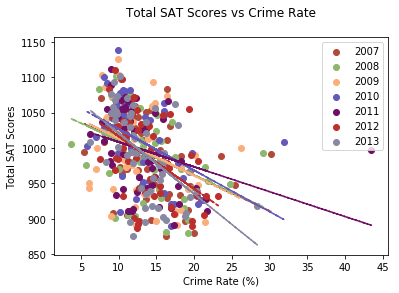

In [8]:
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Crime Rate (%)")
plt.title("Total SAT Scores vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])

np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = sat_total[year-2007]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

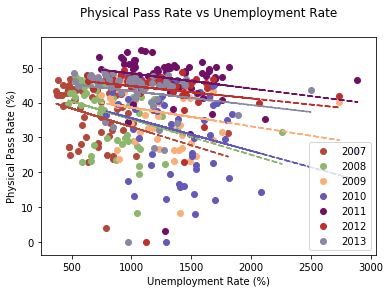

In [9]:
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_unemployment.xs(str(year),axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Pass Rate (%)")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Physical Pass Rate vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])

np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_unemployment.xs(str(year),axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))    
plt.show()

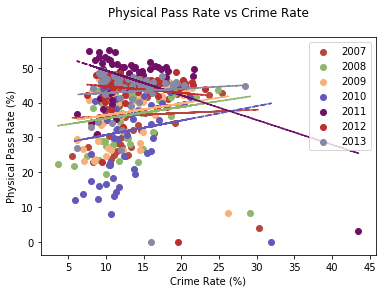

In [10]:
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Pass Rate (%)")
    plt.xlabel("Crime Rate (%)")
plt.title("Physical Pass Rate vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])

np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

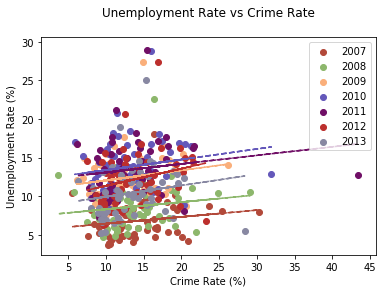

In [11]:
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("Crime Rate (%)")
plt.title("Unemployment Rate vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])

np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()